## Mudcard questions
- **If I have a high imbalanced data of some features, but it is a regression problem, which evaluation metrics should I use?**
    - only the classification target variable can be imbalanced, it generally does not matter if a categorical feature is imbalanced
    - select from any of the regression metrics we will cover today
- **The fbeta score seems muddiest to me - why would we have to square beta to get the relative weight of precision and recall.**
- **Why is the harmonic mean used for the F score?**
    - that's the equation of a weighted harmonic mean
    - there are other means you can use to combine P and R but the weighted harmonic mean has a nice property that other means do not have:
        - if either P or R are 0, the weighted harmonic mean is 0 too 
        - this is not the case for the simple mean for example
- **why we should use a large beta when it's cheap to act?**
    - if beta is large, it will give more weight to recall
    - recall measure what fraction of the condition positives are correctly identified
    - if it's cheap to act and it's not too bad if you act on incorrectly classified points (e.g., send propomtional emails), recall is what you care about most
- **I am a little confused about expensive and cheap act.**
    - you develop ML models to make predictions and more importantly **to act on those predictions**
        - predict stocks price: should i buy or sell certain stocks?
        - predict cancer: should this patient receive chemotherapy? 
        - predict loan defaults: should we give lona to this person or not?
        - predict engagement/shopping: should i send a propmotional email to this person or not?
        - predict if user will click on ad: should i show this ad to the person or not?
    - interventions carry certain risks
        - expensive to act: treating a patient who has no cancer with chemotherapy is a very bad idea 
            - making a mistake is costly because chemo is tough and has a ton of sideeffects
        - cheap to act: sending an email to a customer is no big deal even if they won't shop
            - the mistake is not costly because an extra email in someone's mailbox is no big deal
- **I'm a little confused about the normalization part in the plot_confusion_matrix function.**
- **if I apply normalization to confusion matrix, how that going to effect the result?**
    - there are several ways to normalize the confusion matrix
    - the plot_confusion_matrix function normalizes along the true class 0/1 rows so the values of each row will sum to 1 while the values of each column won't
    - you could also normalize the whole confusion matrix such that all values sum to 1
    - you could also normalize such that the predicted class0/1 columns sum to 1 but this is rarely done
- **still confused about how to choose a metric**
    - always consider how you will act based on the model's prediction
    - weight how bad it is to act on a false positive and how bad it is to not act on a false negative
- **How do you come to a final decision on what B should be? I understand that B effects accuracy and precision, and you can change B to effect the scores of each, but how do you decide to what degree you change B?**
    - see answers above
    - how will you act based on your model's prediction?
    - weight the effect of incorrect action on false positives and false neagtives

## Evaluation metrics in supervised ML, part 2, predicted probabilities and regression metrics

By the end of this lecture, you will be able to
- Summarize the ROC and precision-recall curves, and the logloss metric
- Describe the most commonly used regression metrics


## <font color='LIGHTGRAY'> Evaluation metrics in supervised ML, part 2, predicted probabilities and regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Summarize the ROC and precision-recall curves, and the logloss metric**
- <font color='LIGHTGRAY'>Describe the most commonly used regression metrics</font>


### The ROC curve
- Receiver Operating Characteristic
   - x axis: false positive rate (fpr = FP / (FP + TN))
   - y axis: true positive rate (R = TP / (TP + FN))
   - the curve shows fpr and R value pairs for various class 1 critical probabilities
- upper left corner: perfect predictor
- diagonal point: chance level predictions
- lower right corner: worst predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
df = pd.read_csv('data/true_labels_pred_probs.csv')

y_true = df['y_true']
pred_prob_class1 = df['pred_prob_class1']

fpr = np.zeros(len(y_true))
tpr = np.zeros(len(y_true))

p_crits = np.sort(pred_prob_class1) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    
    y_pred = np.zeros(len(y_true))
    y_pred[pred_prob_class1 < p_crit] = 0
    y_pred[pred_prob_class1 >= p_crit] = 1
    
    C = confusion_matrix(y_true,y_pred) 
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

# from sklearn.metrics import roc_curve
# # the roc_curve function performs the same calculation
# fpr,tpr,p_crits = roc_curve(y_true,pred_prob_class1)

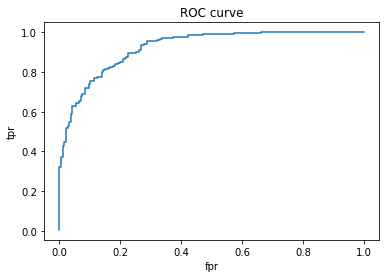

In [2]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Quiz 1
What's the (fpr,tpr) coordinate on the ROC curve if p_crit = 1?

## ROC AUC
- ROC is useful but it is not a single number metric
   - it cannot be directly used to compare various classification models
- summary statistics based on the ROC curve (for a complete list, see [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations))
- most commonly used metric is ROC AUC - ROC Area Under the Curve
   - AUC = 1 is a perfect classifier
   - AUC > 0.5 is above chance-level predictor
   - AUC = 0.5 is a chance-level classifier
   - AUC < 0.5 is a bad predictor
   - AUC = 0 classifies all points incorrectly

In [4]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true,pred_prob_class1))

0.9236524315231854


## Precision-recall curve
- the drawback of ROC is that it uses TN, not good for imbalanced problems.
- the precision-recall curve doesn't use TN, ideal for imbalanced problems.

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_true,pred_prob_class1)

print(average_precision_score(y_true,pred_prob_class1))

0.9315588971251673


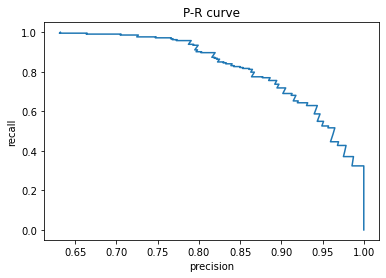

In [6]:
plt.plot(p,r)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('P-R curve')
plt.show()


## Quiz 2
What's the (p,r) coordinate on the curve if p_crit = 0?

## The logloss metric

### <center>$logloss = - \frac{1}{N}\sum (y_{true}\ln(p_{pred}) + (1-y_{true})(1-\ln(1-p_{pred})))$</center>
- $p_{pred}$ is the predicted probability of the **positive class**
- the predicted probabilities are not converted into predicted classes
- excellent choice if you need accurate probabilities (e.g., when it is expensive/costly to act due to limited resources so you need to rank your points based on probabilities)
- two scenarios:
   - y_true = 0 - left term disappears
   - y_true = 1 - right term disappears
- log(0) is undefined
   - $p_{pred}$ is replaced with $\max(\min(p,1-10^{-15}),10^{-15})$ to avoid this issue

### The extreme cases
- the classifier is confidently wrong
   - $p_{pred} = 10^{-15}$ for points in class 1
   - $p_{pred} = 1 - 10^{-15}$ for points in class 0
<center>$logloss = -\frac{1}{N}\sum \ln(10^{-15}) = -\ln(10^{-15})$</center>
<center> $logloss \sim  34.5  $</center>

- the classifier is correct
   - $p_{pred} = 10^{-15}$ for points in class 0
   - $p_{pred} = 1 - 10^{-15}$ for points in class 1
<center>$logloss = -\frac{1}{N}\sum (1-0)(1-\ln(1-10^{-15})) = 10^{-15}$ for class 0</center>
<center>$logloss = -\frac{1}{N}\sum 1*\ln(1-10^{-15}) = 10^{-15}$ for class 1</center>
<center>$logloss \sim 0$</center>



In [8]:
from sklearn.metrics import log_loss
print(log_loss(y_true,pred_prob_class1))
help(log_loss)

0.35015190545328556
Help on function log_loss in module sklearn.metrics._classification:

log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    Log loss, aka logistic loss or cross-entropy loss.
    
    This is the loss function used in (multinomial) logistic regression
    and extensions of it such as neural networks, defined as the negative
    log-likelihood of a logistic model that returns ``y_pred`` probabilities
    for its training data ``y_true``.
    The log loss is only defined for two or more labels.
    For a single sample with true label yt in {0,1} and
    estimated probability yp that yt = 1, the log loss is
    
        -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
    
    Read more in the :ref:`User Guide <log_loss>`.
    
    Parameters
    ----------
    y_true : array-like or label indicator matrix
        Ground truth (correct) labels for n_samples samples.
    
    y_pred : array-like of float, shape = (n_samples, n_c

## <font color='LIGHTGRAY'> Evaluation metrics in supervised ML, part 2, predicted probabilities and regression</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Summarize the ROC and precision-recall curves, and the logloss metric</font>
- **Describe the most commonly used regression metrics**


## Regression metrics
- the target variable is continuous
- the predicted values are also continuous
- regression metrics measure some type of difference between y (true values) and y' (predicted values)

### Mean Squared Error 

### <center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>

<center><img src="figures/polifit_1.jpg" width="450"></center>

#### The unit of MSE is not the same as the target variable.

### Root Mean Square Error

### <center>$RMSE(y,y') = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2}$</center>


### Mean Absolute Error

### <center>$MAE(y,y') = \frac{1}{n}\sum_{i=1}^{n}|y_i-y_i'|$</center>

#### Both RMSE and MAE have the same unit as the target variable.


## R2 score - coefficient of determination

### <center>$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,</center>
<center>where $\bar{y}$ is the mean of $y$.</center>

- R2 = 1 is the perfect regression model ($y == y'$)
- R2 = 0 is as good as a constant model that always predicts the expected value of y ($\bar{y}$)
- R2 < 0 is a bad regression model

#### R2 is dimensionless.

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

- RMSE is not implemented in sklearn, but you can calculate it as `np.sqrt(mean_squared_error(y_true,y_pred))`
- you can find more on regression metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

## Quiz 3
Read in `data/reg_preds.csv`. It contains two columns: 

- y_true: value of owner-occupied homes in $1000's in Boston
- y_pred: predictions of a regression model

What's the ratio between the MSE and the variance of the home values? How does this ratio relate to the R2 score?

## Mudcard